# IMPORTING REQUIRED LIBRARIES

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# MOUNTING GOOGLE DRIVE TO ACCESS, LOAD AND READ DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/social-media.csv')
df.head()

,UserId,UsageDuraiton,Age,Country,TotalLikes
0,1,2,55,Turkey,5
1,2,6,45,Canada,10
2,3,3,50,Ireland,7
3,4,4,35,South Africa,5
4,5,1,58,Turkey,2


# EXPLORING THE DATASET

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserId         63 non-null     int64 
 1   UsageDuraiton  63 non-null     int64 
 2   Age            63 non-null     int64 
 3   Country        63 non-null     object
 4   TotalLikes     63 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.6+ KB


In [ ]:
df.shape

(63, 5)

In [ ]:
df.describe()

,UserId,UsageDuraiton,Age,TotalLikes
count,63.000000,63.000000,63.000000,63.000000
mean,31.761905,4.000000,33.777778,5.317460
std,18.015866,2.879292,15.540213,6.135106
min,1.000000,1.000000,18.000000,0.000000
25%,16.500000,2.000000,19.000000,1.500000
50%,32.000000,3.000000,26.000000,4.000000
75%,47.500000,5.000000,50.000000,6.000000
max,62.000000,13.000000,60.000000,28.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
UserId,0
UsageDuraiton,0
Age,0
Country,0
TotalLikes,0


In [ ]:
df.columns

Index(['UserId', 'UsageDuraiton', 'Age', 'Country', 'TotalLikes'], dtype='object')

# CLEANING THE DATA

In [ ]:
df.rename(columns={'UsageDuraiton' : 'UsageDuration'}, inplace=True)

In [ ]:
df.columns

Index(['UserId', 'UsageDuration', 'Age', 'Country', 'TotalLikes'], dtype='object')

In [ ]:
duplicates = df.duplicated().sum()
duplicates

0

In [ ]:
print({"Data types of Each column"})
print(df.dtypes)

{'Data types of Each column'}
UserId            int64
UsageDuration     int64
Age               int64
Country          object
TotalLikes        int64
dtype: object


In [ ]:
df['UserId'] = df['UserId'].astype('object')
print("\nData Types After Conversion")
print(df.dtypes)


Data Types After Conversion
UserId           object
UsageDuration     int64
Age               int64
Country          object
TotalLikes        int64
dtype: object


In [ ]:
lower_bound = df['TotalLikes'].quantile(0.01)
upper_bound = df['TotalLikes'].quantile(0.99)
df = df[(df['TotalLikes'] >= lower_bound) & (df['TotalLikes'] <= upper_bound)]
print("Data shape after removing outliers:", df.shape)

Data shape after removing outliers: (57, 5)


# VISUALIZING THE DATA

In [ ]:
lower_bound=df['UsageDuration'].quantile(0.01)
upper_bound=df['UsageDuration'].quantile(0.99)
df=df[(df['UsageDuration'] >=lower_bound)&(df['UsageDuration']<=upper_bound)]

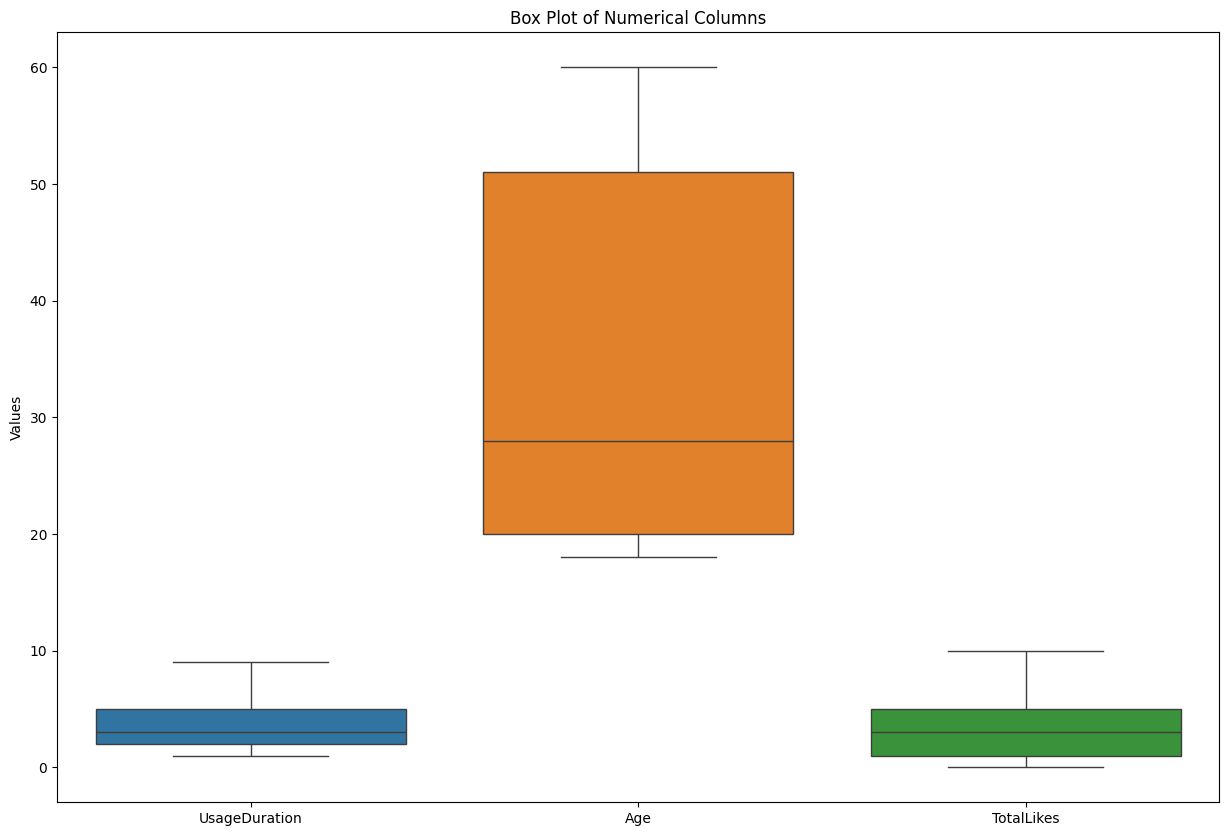

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Box Plot of Numerical Columns')
plt.ylabel('Values')
plt.show()

In [ ]:
df.shape

(57, 5)

#UNIVARIATE ANALYSIS


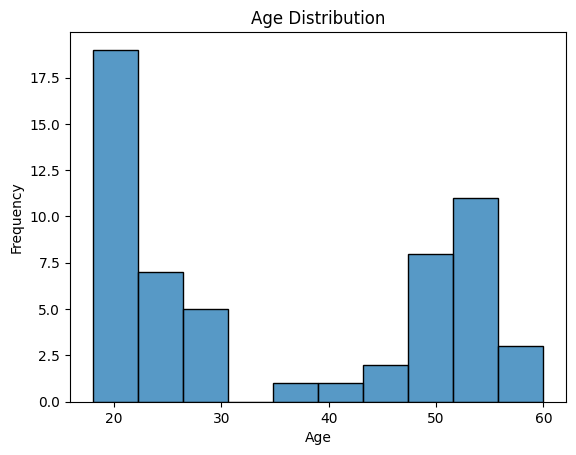

In [ ]:
sns.histplot(df['Age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

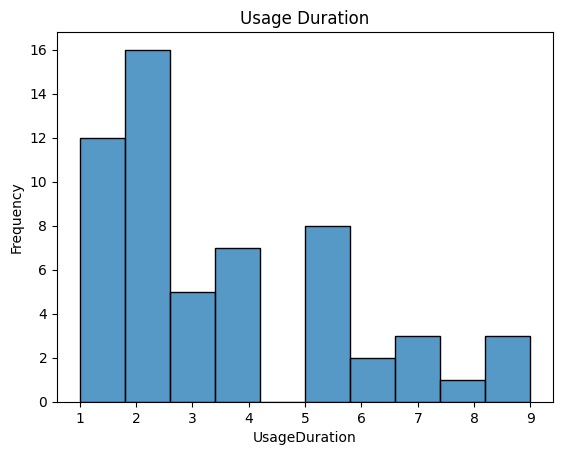

In [ ]:
sns.histplot(df['UsageDuration'], bins=10)
plt.title('Usage Duration')
plt.xlabel('UsageDuration')
plt.ylabel('Frequency')
plt.show()

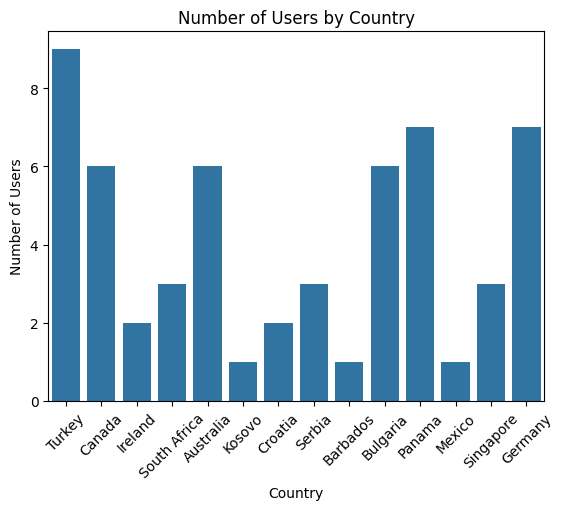

In [ ]:
sns.countplot(x='Country', data=df)
plt.title('Number of Users by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

# BIVARIATE ANALYSIS

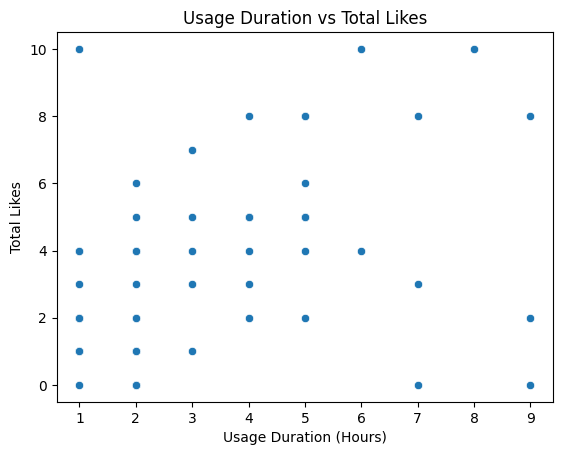

In [ ]:
sns.scatterplot(x='UsageDuration', y='TotalLikes', data=df)
plt.title('Usage Duration vs Total Likes')
plt.xlabel('Usage Duration (Hours)')
plt.ylabel('Total Likes')
plt.show()

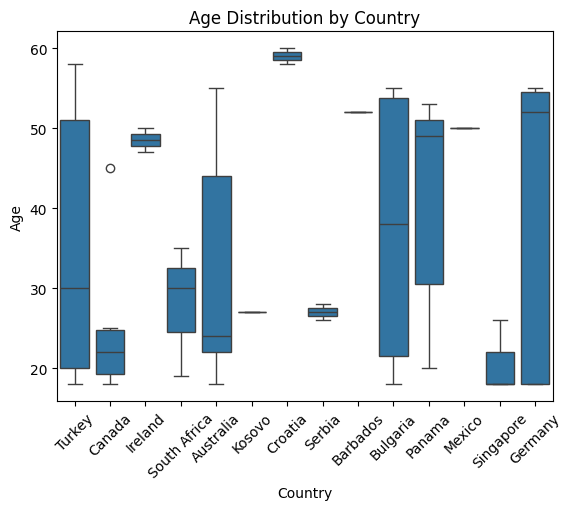

In [ ]:
sns.boxplot(x='Country', y='Age', data=df)
plt.title('Age Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

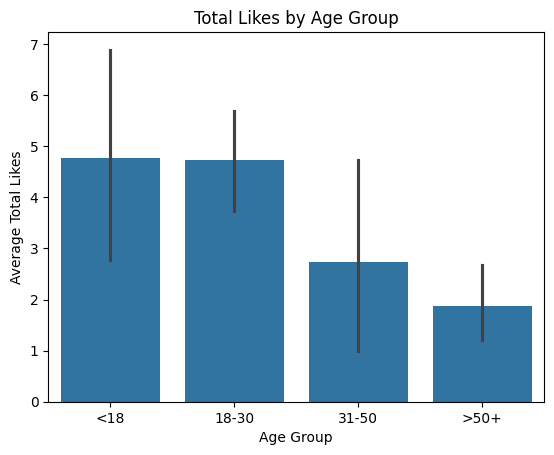

In [ ]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['<18', '18-30', '31-50', '>50+'])
sns.barplot(x='AgeGroup', y='TotalLikes', data=df)
plt.title('Total Likes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Total Likes')
plt.show()

# MULTIVARIATE ANALYSIS

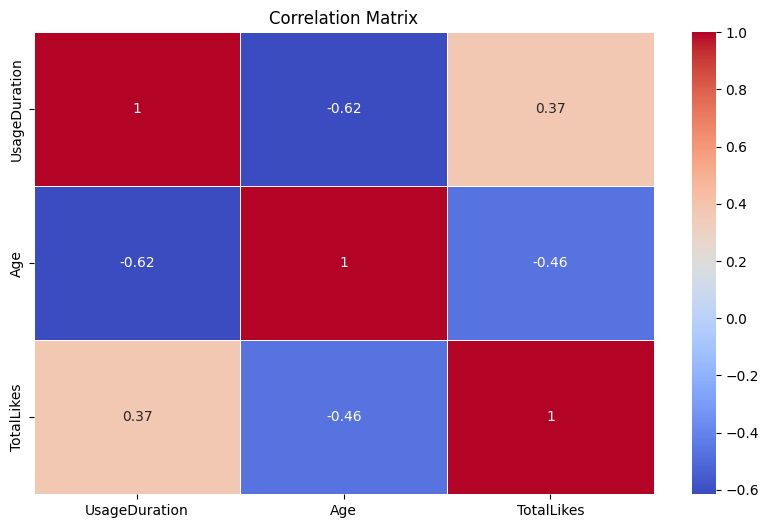

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Matrix')
plt.show()


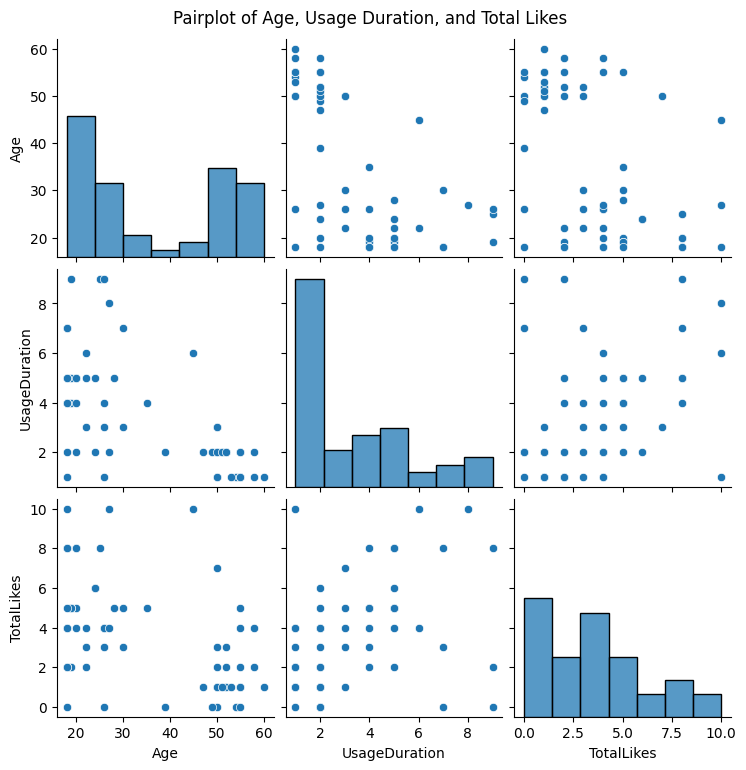

In [ ]:
sns.pairplot(df, vars=['Age', 'UsageDuration', 'TotalLikes'])
plt.suptitle('Pairplot of Age, Usage Duration, and Total Likes', y=1.02)
plt.show()

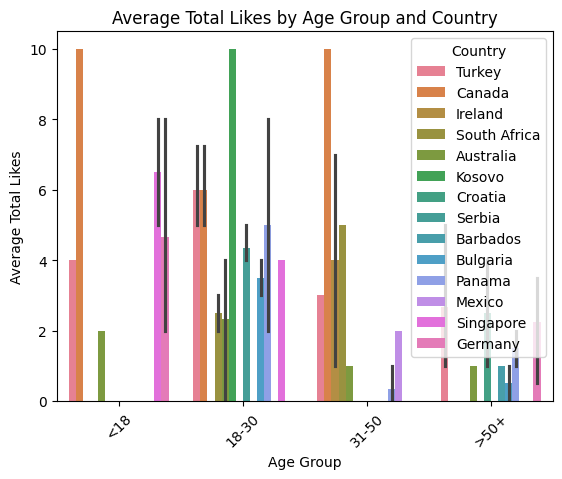

In [ ]:
sns.barplot(x='AgeGroup', y='TotalLikes', hue='Country', data=df)
plt.title('Average Total Likes by Age Group and Country')
plt.xlabel('Age Group')
plt.ylabel('Average Total Likes')
plt.xticks(rotation=45)
plt.show()

# SAVING THE CLEAN DATAFRAME

In [ ]:
from google.colab import files
df.to_csv('cleaned_social-media.csv', index=False)
files.download('cleaned_social-media.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>